For: Shilo Jones

From: Bryce Frank

# Introduction

Using `bokeh` and `matplotlib` I constructed a few sample visualizations using the `download.xlsx` dataset. For this project I stuck to static plots to explore some relationships in the data and present to you some possible routes for future visualizations, many of which can be extended via the scripts I have already written. Please let me know if you would like to continue working on any of these visualizations.

I also provide my source code as a deliverable. If you or anyone else on your team are interested in developing this mini-package further, it is now available to you. The following document showcases how the function calls are structured for use in automated plot creation.

My general conclusion is that `bokeh` provides a good opportunity for you to provide visualized information to your clients, but as a rule there are plenty of visualization packages available. If you are looking for a purely Javascript visualization library, [`d3`](https://d3js.org/) may be of interest for your organization, but is regarded to be a more of a time commitment in terms of development. `bokeh` is relatively easy to learn, but may not provide as much flexibility if you want to create a web-based deliverable, you also have to commit to including the `bokeh` logo on each plot.

# Click Volume by Classification

As per our discussion, I added click volume by classification. The principle is very similar to the Venn Diagrams, but displayed as histograms and the bars are weighted by click volume rather than frequency in `download.xlsx`. We supply a list of two semantic terms and the plot is produced. This is nothing earth shattering, but the source code should prove useful for a lot of applications.

In [1]:
import main
main.click_volume2(main.data, ['PriceResearch', 'Brand'])

Loading BokehJS ...

# Combinations Search Raster

You mentioned wanting to be able to quickly examine combinations of searches that produce high Value per Click. Given that the download.xlsx did not have this data, I simulated a few values. This plot will be more informative with real data!

One way we can quickly examine relationships and pick out high values is by using a pair-wise comparison raster. Each cell represents a combination of appearance. For example, the top left cell represents records where `State` and `Unclassified` were both in the semantic classification. The value of each cell is the total value per click for all of those appearances.

I had to use a logarithmic scale to expose any useful relationships due to the very heavy weighting of `Unclassified`. I suspect this will vary heavily depending on the client and search data. The plot demonstrates that `ProductCategory` and `Brand` are important searches that result in high value per click volumes.

There is a lot of opportunity with this raster for a bit more robust analysis via interactions, however this would take a good effort to develop.

In [2]:
main.search_raster(main.data)

Loading BokehJS ...

# Venn Diagram

The plot you suggested for these data was a Venn diagram. A Venn diagram is a useful way to examine membership of non-exclusive sets. It seems to me that you are referring to the semantic classification in this case, although this can be easily translated to the portfolio classification as well. The venn diagram plots do not use `bokeh`, but rather a `matplotlib` derivative called `matplotlib-venn`.


The plot describes the number of search records where the semantic classification includes `Brand` or `City` or both.

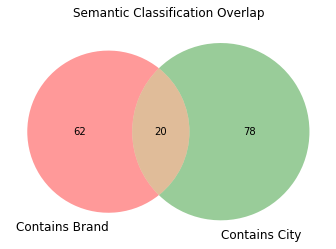

In [3]:
import main
import matplotlib.pyplot as plt
main.venn_diagram2(main.data, ['Brand', 'City'], click_lower_bound=5)

We can give any combination of two semantic classification terms to the `venn_diagram2` function and the plot will adapt accordingly.

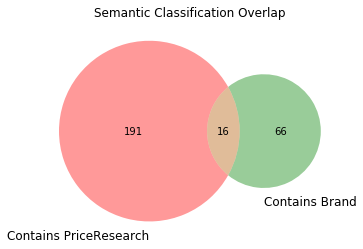

In [4]:
main.venn_diagram2(main.data, ['PriceResearch', 'Brand'])

Sometimes we will want more than just two sets, however. I also made a function, `venn_diagram3` for 3 sets. Anything beyond 3 sets risks the lack of interpretability, so I stopped here.

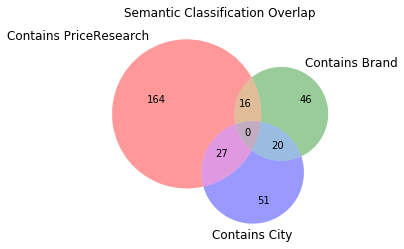

In [5]:
main.venn_diagram3(main.data, ['PriceResearch', 'Brand', 'City'])

Again, if these are not the sorts of set analysis you are looking for, the function can be easily adapted to accomodate for this.

# Clicks vs. Impressions

As a bit of an advertising novice, I focused on `Clicks` and `Impressions`. This seemed to be an interesting relationship for companies that would like to quantify which search terms / queries generated the most clicks per impression. The plot is included as a `.html` file under `plots/clicks_v_impressions.html`.

A nice feature of this plot is the tooltip, that provides information about each data point. This tooltip can be extended to include an arbitrary number of other values in the given record, I included the search term and the cost as examples.

I also colored each point by whether or not in contains PriceResearch in the semantic classification, this can be controlled with the `semantic_term` argument. Coloring each point can be done for arbitrary categories, this is just an example.

In [6]:
from bokeh.io import output_notebook
main.clicks_v_impressions(main.data, click_lower_bound=300, semantic_term='PriceResearch')

Loading BokehJS ...

The above plot is just scratching the surface with scatter plots. We can expand on this plot by adding categorical data for coloring each point, we can "facet" the data into distinct groups, etc.

# Most "Impressive" Semantic Classifcations

This is a basic histogram plot for the most commonly searched semantic classifcations for paid search portfolios. Due to the large number of columns involved, this type of plot would generally be too busy along the x-axis. Thanks to tooltips, we can increase the number of columns and preserve interpretability.

Here I just grouped the data by semantic classification and plotted the number of impressions for that group. There are a few tweaks to be made (for example should we treat Unclassified + ProductCategory the same as ProductCategory + Unclassifies, etc.). I suggest considering this upstream in the classification package itself, rather than in the plotting package.

In [8]:
main.volume_histogram(main.data)

Loading BokehJS ...

# A Note on Interactive Plots

`bokeh` does provide means to create interactive plots. [Here](https://demo.bokehplots.com/apps/movies) is an example of that functionality. I did not dive too deep into this, as it is a bit more involved from a delivery standpoint (it requires running a small server application). However, I do see some opportunity here as a deliverable to your clients. If you have someone familiar with web design on your staff, setting up the interactive plots should not be terribly involved, the bulk of the work will be writing the plot applications themselves, which benefit from a bit of knowledge about basic HTML.